  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

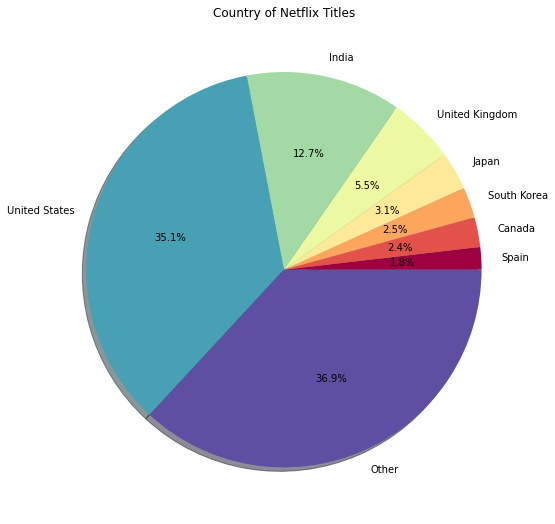

In [3]:
import pandas as pd 
from collections import Counter
from matplotlib.gridspec import GridSpec
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
print(df.head())

print(Counter(df['type']))
title_type = df.groupby('type').agg('count')
print(title_type)

print(Counter(df['rating']))





type_labels = title_type.show_id.sort_values().index 
type_counts = title_type.show_id.sort_values()


title_rating = df.groupby('rating').agg('count')
rating_labels = title_rating.show_id.sort_values().index 
rating_counts = title_rating.show_id.sort_values()



plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

#plt.subplot(the_grid[0, 1], aspect=1, title='Listed Category of Netflix Titles')
#type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
#plt.show()

def group_lower_ranking_values(column):
    rating_counts = df.groupby(column).agg('count')
    pct_value = rating_counts[lambda x: x.columns[0]].quantile(.99)
    values_below_pct_value = rating_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Other'
        return row 
    rating_grouped = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return rating_grouped




rating_grouped = group_lower_ranking_values('rating')
rating_labels = rating_grouped.show_id.sort_values().index 
rating_counts = rating_grouped.show_id.sort_values()

country_grouped = group_lower_ranking_values('country')
country_labels = country_grouped.show_id.sort_values().index 
country_counts = country_grouped.show_id.sort_values()

plt.subplot(the_grid[0, 1], aspect=1, title='Country of Netflix Titles')
type_show_ids = plt.pie(country_counts, labels=country_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()